In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import pathlib

In [2]:
print(tf.__version__)

2.9.0


In [3]:
data_dir = pathlib.Path(r"C:\Users\acynt\Desktop\weather-dataset")
print(data_dir)

C:\Users\acynt\Desktop\weather-dataset


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1122


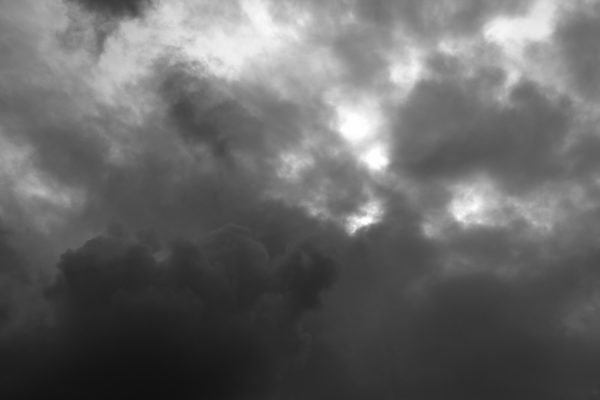

In [5]:
cloudy = list(data_dir.glob('cloudy/*'))
PIL.Image.open(str(cloudy[0]))

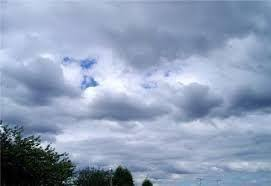

In [6]:
cloudy = list(data_dir.glob('cloudy/*'))
PIL.Image.open(str(cloudy[1]))

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1125 files belonging to 4 classes.
Using 900 files for training.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1125 files belonging to 4 classes.
Using 225 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['cloudy', 'rain', 'shine', 'sunrise']


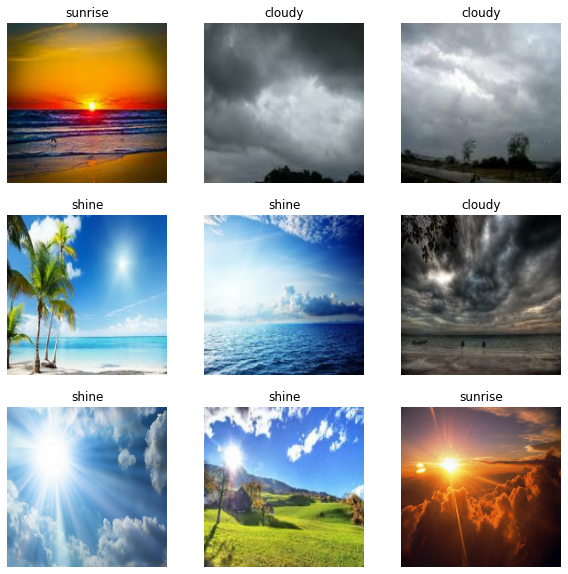

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [13]:
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

129.0 255.0


In [14]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.13025056 0.7905229


In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [22]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [23]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [24]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
29/29 [==============================] - 1s 27ms/step - loss: 7.3507 - accuracy: 0.4833 - val_loss: 1.0976 - val_accuracy: 0.5644
Epoch 2/10
29/29 [==============================] - 1s 19ms/step - loss: 0.9443 - accuracy: 0.6756 - val_loss: 0.8960 - val_accuracy: 0.6622
Epoch 3/10
29/29 [==============================] - 0s 17ms/step - loss: 0.7135 - accuracy: 0.7444 - val_loss: 0.9284 - val_accuracy: 0.6489
Epoch 4/10
29/29 [==============================] - 1s 17ms/step - loss: 0.5530 - accuracy: 0.8000 - val_loss: 0.7558 - val_accuracy: 0.7511
Epoch 5/10
29/29 [==============================] - 1s 18ms/step - loss: 0.4535 - accuracy: 0.8467 - val_loss: 0.9100 - val_accuracy: 0.6578
Epoch 6/10
29/29 [==============================] - 1s 19ms/step - loss: 0.4257 - accuracy: 0.8622 - val_loss: 0.9104 - val_accuracy: 0.7644
Epoch 7/10
29/29 [==============================] - 0s 17ms/step - loss: 0.2193 - accuracy: 0.9311 - val_loss: 1.0716 - val_accuracy: 0.7244
Epoch 8/10
29